# Explorative data analysis

In this notebook we analyze some text resources present in `../resources`.
Resources are made of:
- *out-of-domain* resources like irrelevant chatter live in folders `../resources/convo` and `../resources/chatterbox` and are made of various small-talks
- *in-domain* text resources are sample knowledge bases (for the moment copy-pastes from online FAQs). Those texts are focused to a specific domain.

In [103]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import PlaintextCorpusReader

from pathlib import Path

pd.option_context('display.precision', 3)


In [96]:
# Download of dictionaries
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/jlinho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jlinho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
# Useful variables
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
resources_dir = Path("../resources/") 

In [99]:
# Load chatterbox corpus
from nltk.corpus import PlaintextCorpusReader


chatterbox_dir = str(resources_dir / "chatterbox")
chatterbox_corpus = PlaintextCorpusReader(chatterbox_dir, '.*\.yml')
chatterbox_corpus.fileids()


['ai.yml',
 'botprofile.yml',
 'computers.yml',
 'conversations.yml',
 'emotion.yml',
 'food.yml',
 'gossip.yml',
 'greetings.yml',
 'health.yml',
 'history.yml',
 'humor.yml',
 'literature.yml',
 'money.yml',
 'movies.yml',
 'politics.yml',
 'psychology.yml',
 'science.yml',
 'sports.yml',
 'trivia.yml']

In [100]:
# generates all lemas from a file, with a minimum word length
def lemmas(file_id: str, min_word_length: int = 3):
    for w in chatterbox_corpus.words(file_id):
        if w.isalpha() and w not in stop_words and len(w) >= min_word_length:
            yield lemmatizer.lemmatize(w.lower())
            
# Generates all word lengths from a file
def word_length(file_id: str):
    for w in chatterbox_corpus.words(file_id):
        if w.isalpha():
            yield len(w)            
            

In [104]:
# Let's gather simple statistics for each file an put them in a dataframe
from collections import defaultdict


data = defaultdict(list)
for fileid in chatterbox_corpus.fileids():
    data['chars'].append(len(chatterbox_corpus.raw(fileid)))
    data['words'].append(len(chatterbox_corpus.words(fileid)))
    data['sents'].append(len(chatterbox_corpus.sents(fileid)))
    data['vocab'].append(len(set(w.lower()  for w in chatterbox_corpus.words(fileid))))
    data['lemmas'].append(len(set(lemmas(fileid))))
      
chatterbox_df = pd.DataFrame(data, columns=['chars', 'words', 'sents', 'vocab', 'lemmas'], index=chatterbox_corpus.fileids())
chatterbox_df['avg_word_length'] = chatterbox_df['chars'] / chatterbox_df['words']
chatterbox_df['avg_sent_length'] = chatterbox_df['words'] / chatterbox_df['sents']
chatterbox_df['avg_vocab_repeat'] = chatterbox_df['words'] / chatterbox_df['vocab']

chatterbox_df


,chars,words,sents,vocab,lemmas,avg_word_length,avg_sent_length,avg_vocab_repeat
ai.yml,8340,1950,145,412,313,4.276923,13.448276,4.733010
botprofile.yml,1390,332,20,118,78,4.186747,16.600000,2.813559
computers.yml,3744,726,50,270,201,5.157025,14.520000,2.688889
conversations.yml,4682,1142,124,316,237,4.099825,9.209677,3.613924
emotion.yml,10337,2531,248,407,317,4.084156,10.205645,6.218673
food.yml,1266,315,23,113,66,4.019048,13.695652,2.787611
gossip.yml,2119,472,28,183,115,4.489407,16.857143,2.579235
greetings.yml,1035,318,44,57,32,3.254717,7.227273,5.578947
health.yml,201,49,6,32,16,4.102041,8.166667,1.531250
history.yml,795,166,10,79,47,4.789157,16.600000,2.101266


Comment: it looks like average word length tells us about the style of the document: greatings or health have short sentences (avg_sent_length) but literature, history or science have long sentences.

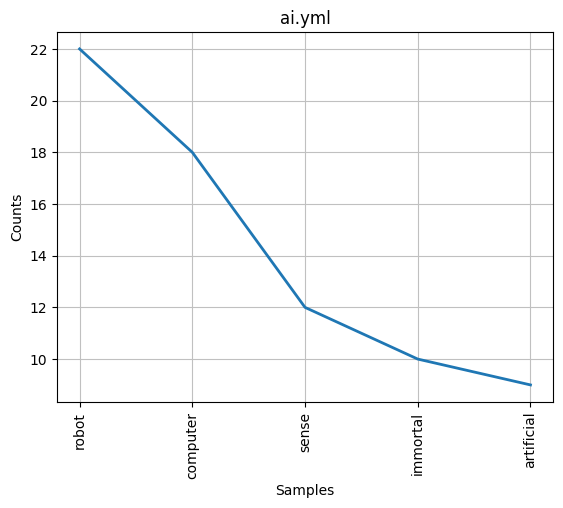

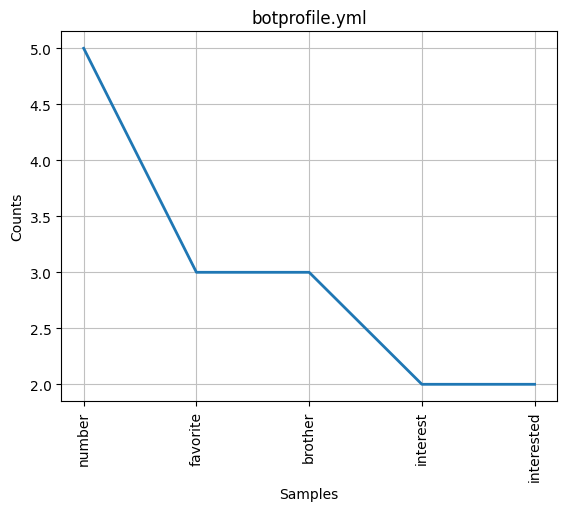

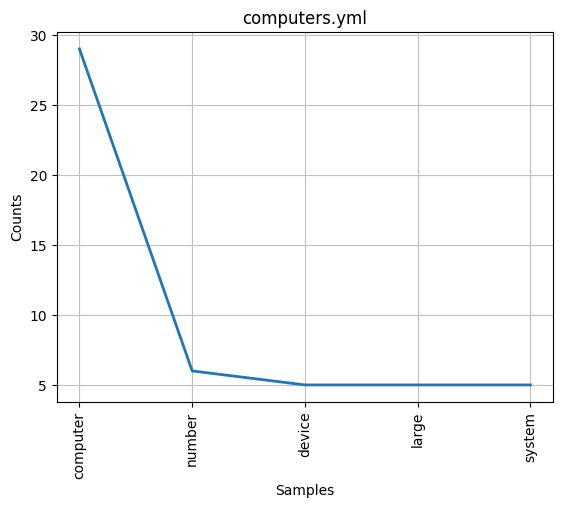

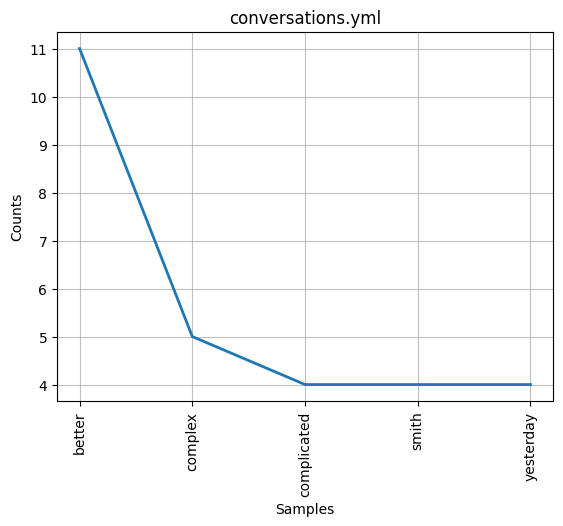

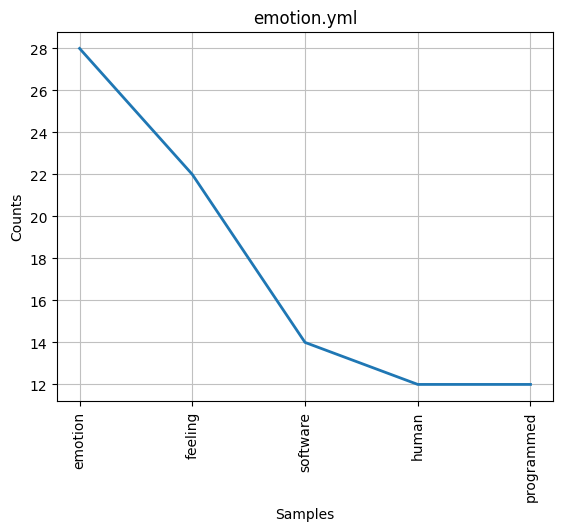

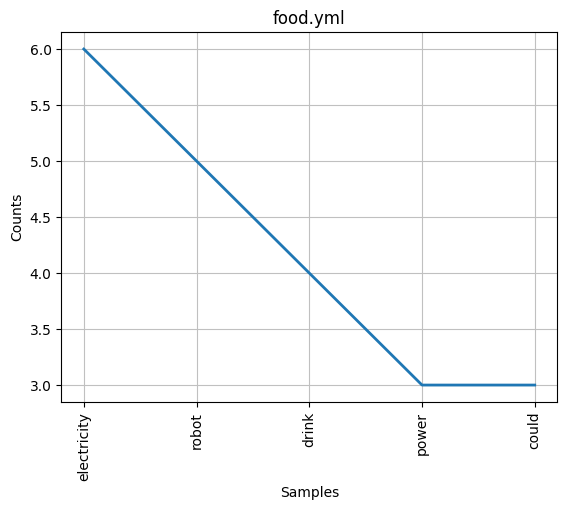

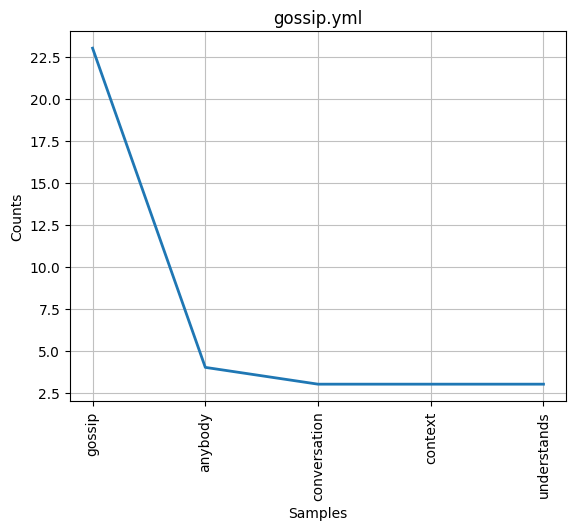

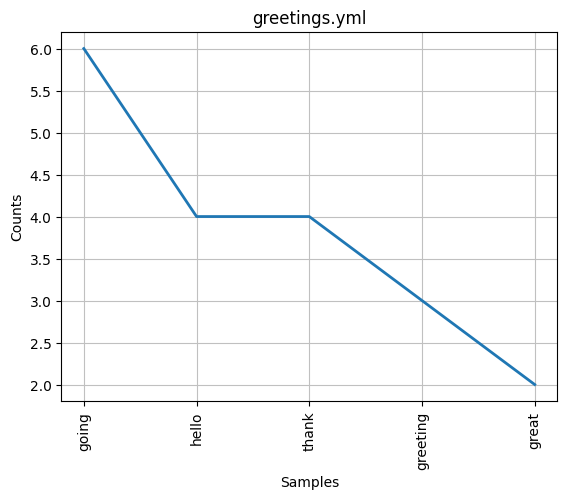

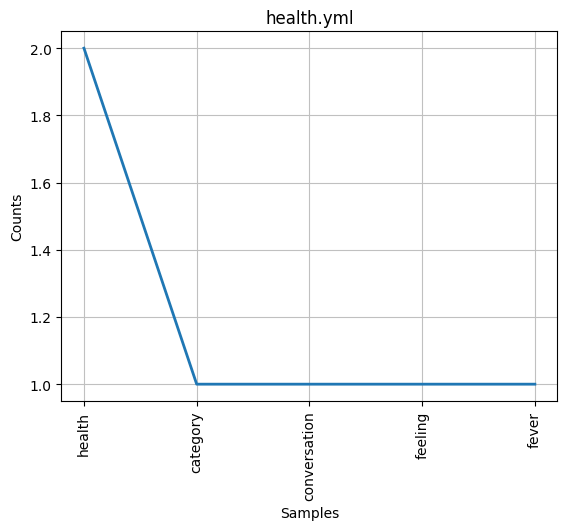

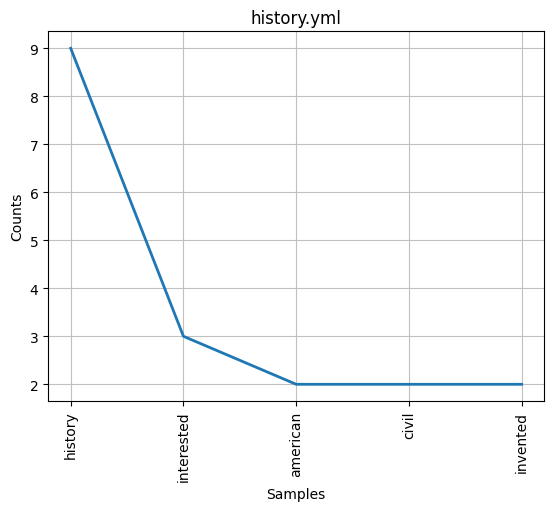

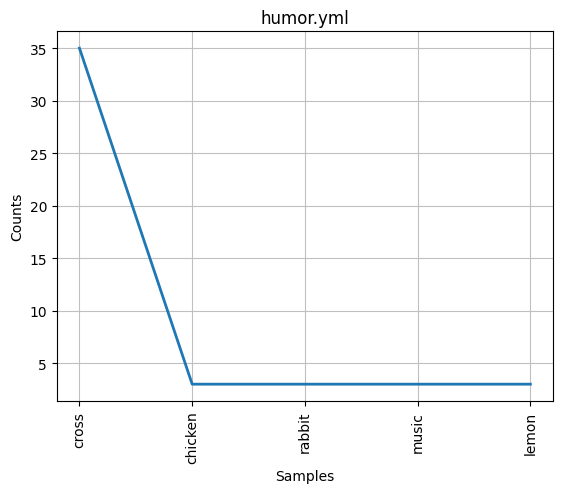

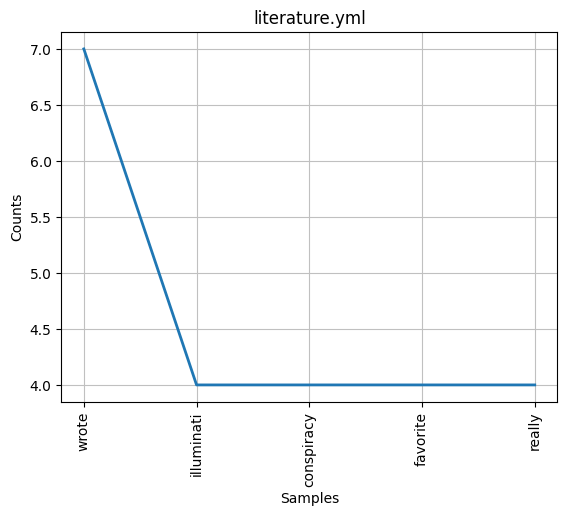

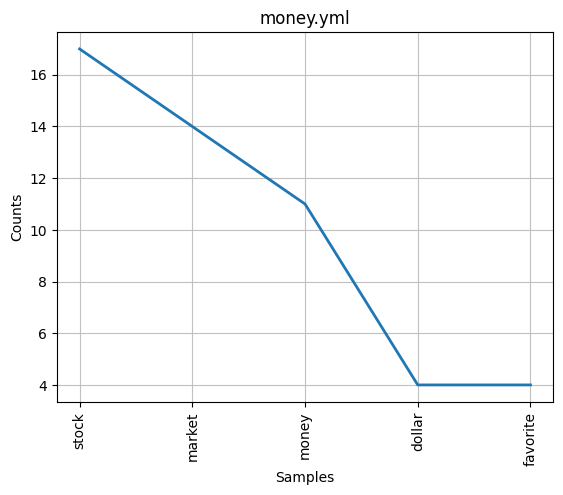

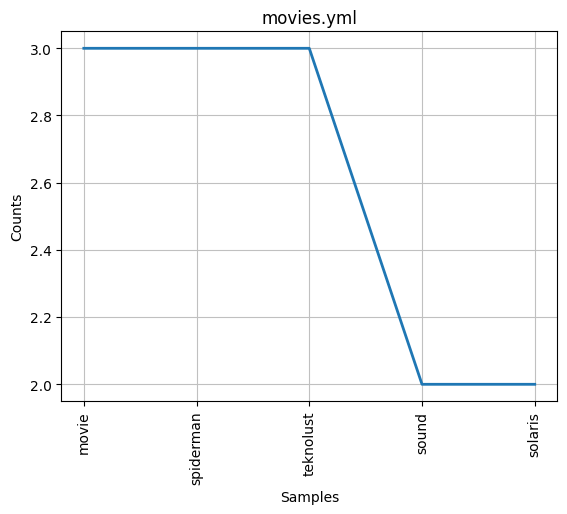

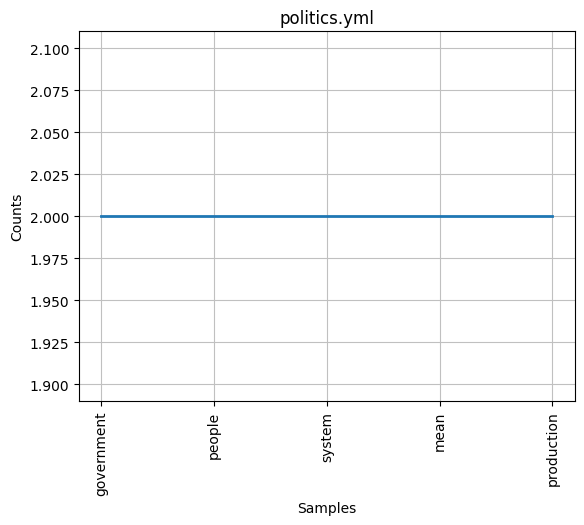

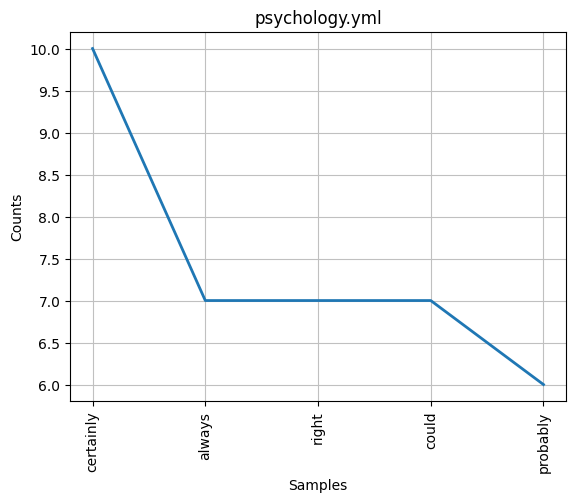

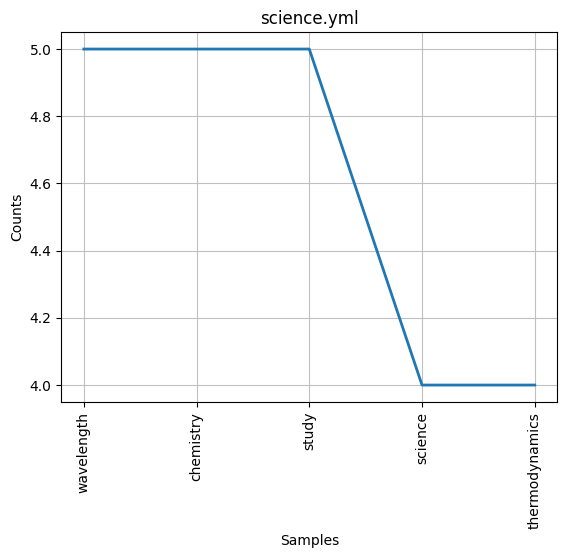

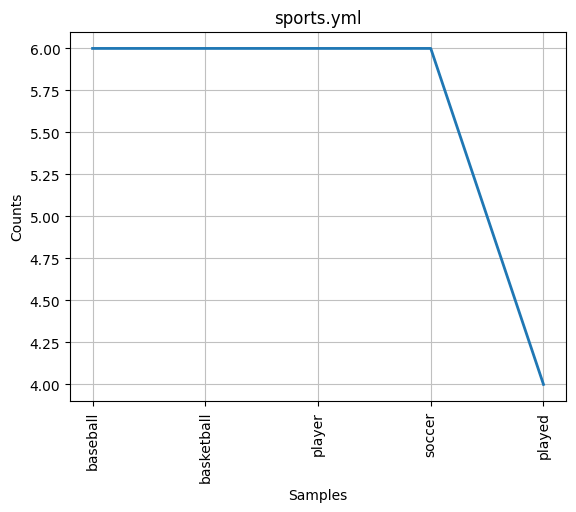

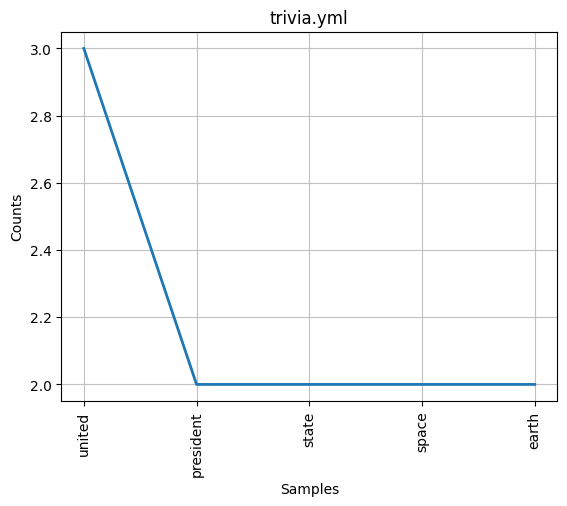

In [130]:

# Get a sense if most common words clarify well the topic of the file

# For each file find most common words that have a minimum length of 5

freq_dist = nltk.ConditionalFreqDist( (fileid, lemma) for fileid in chatterbox_corpus.fileids() for lemma in list(lemmas(fileid, min_word_length=5)))


for i, fileid in enumerate(chatterbox_corpus.fileids()):
    freq_dist[fileid].plot(5, title=fileid)
    


From most frequent words (with a certain length) we can clearly tell the topic of the document. Keyword frequency is a great feature to get a sense of the topic the document is about.

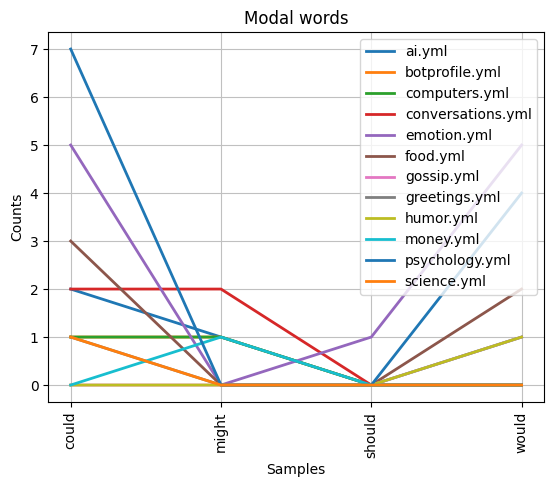

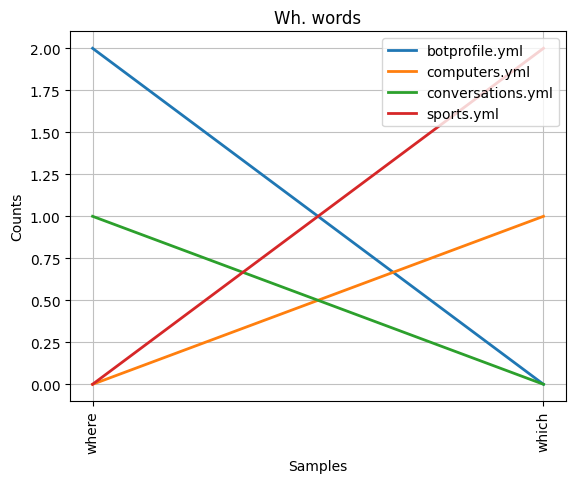

<AxesSubplot: title={'center': 'Wh. words'}, xlabel='Samples', ylabel='Counts'>

In [133]:
# Let's see if modal words or wh-words are more common in some files or document styles.
modal_dist = nltk.ConditionalFreqDist( (fileid, lemma) for fileid in chatterbox_corpus.fileids() for lemma in list(lemmas(fileid, min_word_length=5)) if lemma in ['can', 'could', 'may', 'might', 'must', 'shall', 'should', 'will', 'would'])
wh_dist = nltk.ConditionalFreqDist( (fileid, lemma) for fileid in chatterbox_corpus.fileids() for lemma in list(lemmas(fileid, min_word_length=5)) if lemma in ['what', 'when', 'where', 'which', 'who', 'whom', 'whose', 'why']) 

modal_dist.plot(title="Modal words")
wh_dist.plot(title="Wh. words")


In [134]:
# Are bigrams where onme word is rare telling something about the topic of the file?
health_text = nltk.Text(chatterbox_corpus.words())
health_text.collocations()

stock market; frank herbert; human emotion; operating systems; making
sense; electric sheep; perpetuated indefinitely; sound like; chat
robot; express anger; game played; get mad; much money; artificial
intelligence; large numbers; tell gossips; robot body; yet capable;
Thomas Pynchon; american civil


When our FAQs are scraped it would be useful to compare metrics like `avg_sent_length`, `avg_word_length`, frequency of modals (We expect close to none) and wh-words, to see if those metrics are helping.